In [26]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [27]:
data=pd.read_csv("C:/Users/HP/seaborn-data/titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##  Data Preprocessing:

In [29]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Missing Value

In [31]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Replacing Missing value by Mode

In [32]:
for column in ['age','deck','embarked','embark_town']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [33]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Data Visualition

#### Cheking Outliers:

<AxesSubplot:>

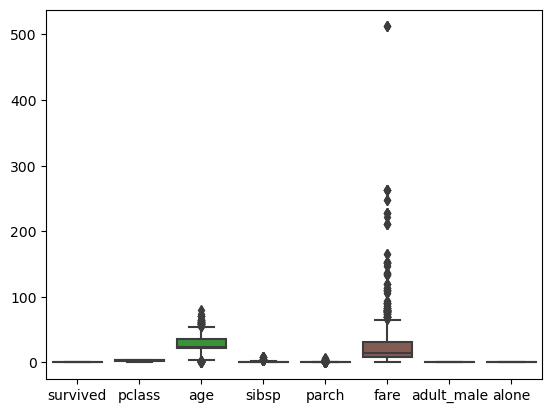

In [34]:
sns.boxplot(data=data)

<AxesSubplot:>

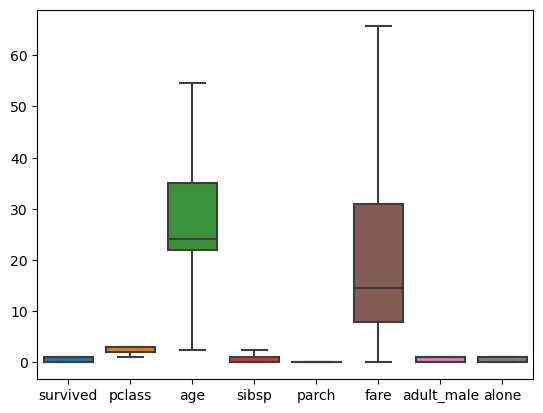

In [35]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)
sns.boxplot(data=data)

### Bar Plot:

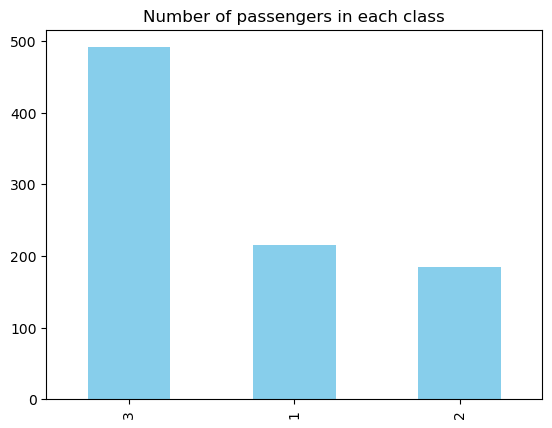

In [36]:
passenger_class=data['pclass'].value_counts()
passenger_class.plot(kind='bar',color='skyblue')
plt.xlable=('Passenger Class')
plt.ylable=('Number of passengers')
plt.title("Number of passengers in each class")
plt.show()

### Scatter Plot

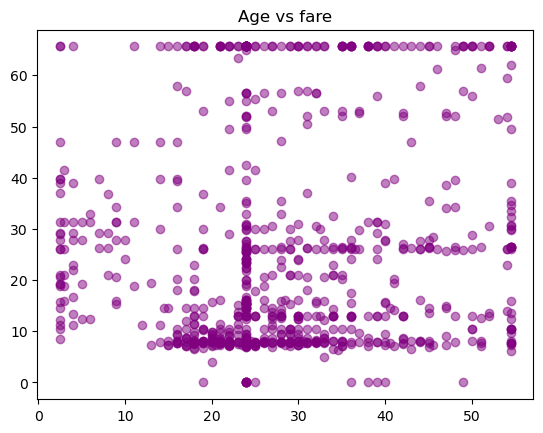

In [93]:
plt.scatter(data['age'],data['fare'],color='purple',alpha=0.5)
plt.xlable=('Age')
plt.ylable=('fare')
plt.title("Age vs fare")
plt.show()

### Joint Bar PLot

Text(0.5, 1.0, 'Passenger class vs Survival Status')

<Figure size 1000x500 with 0 Axes>

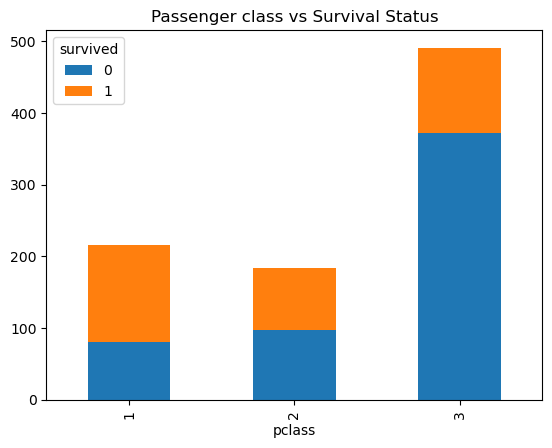

In [38]:
plt.figure(figsize=(10,5))

class_survived=data.groupby(['pclass','survived']).size().unstack()
class_survived.plot(kind='bar',stacked=True)
plt.title('Passenger class vs Survival Status')

### Pai chart

Text(0.5, 1.0, 'pie chart of passenger by Gender')

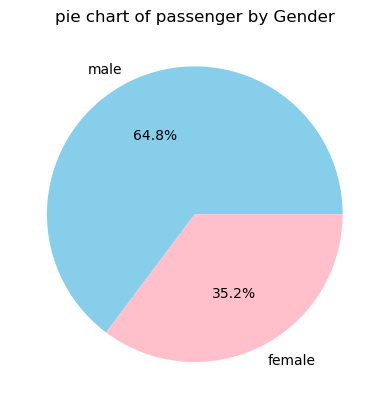

In [39]:
Gender_count=data['sex'].value_counts()
plt.pie(Gender_count,labels=Gender_count.index,autopct='%1.1f%%',colors=["skyblue",'pink'])
plt.title('pie chart of passenger by Gender')

### Histogram

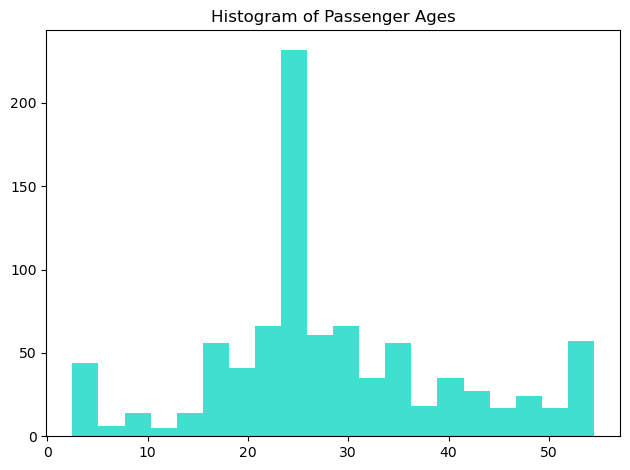

In [40]:
plt.hist(data['age'].dropna(),bins=20,color='turquoise')
plt.xlable=('age')
plt.ylable=('Frequency')
plt.title('Histogram of Passenger Ages')
plt.tight_layout()
plt.show()

### Lable Encoding of Categorical Data

In [41]:
data.select_dtypes(include=[np.number]).columns.tolist()

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [42]:
# Quantitative Variable
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(5)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1.0,0.0,7.2500
1,1,1,38.0,1.0,0.0,65.6344
2,1,3,26.0,0.0,0.0,7.9250
3,1,1,35.0,1.0,0.0,53.1000
4,0,3,35.0,0.0,0.0,8.0500


In [43]:
#Qualitative Variable
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,C,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,C,Southampton,yes


##### Converting qualitative Variable into number

In [44]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,sex,embarked,class,who,deck,embark_town,alive
0,1,2,2,1,2,2,0
1,0,0,0,2,2,0,1
2,0,2,2,2,2,2,1
3,0,2,0,2,2,2,1
4,1,2,2,1,2,2,0


##### Combining the data set

In [45]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,sex,embarked,class,who,deck,embark_town,alive,survived,pclass,age,sibsp,parch,fare
0,1,2,2,1,2,2,0,0,3,22.0,1.0,0.0,7.2500
1,0,0,0,2,2,0,1,1,1,38.0,1.0,0.0,65.6344
2,0,2,2,2,2,2,1,1,3,26.0,0.0,0.0,7.9250
3,0,2,0,2,2,2,1,1,1,35.0,1.0,0.0,53.1000
4,1,2,2,1,2,2,0,0,3,35.0,0.0,0.0,8.0500


### Data Partition

In [46]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
train_x = Final_combined.drop(['survived'],axis=1)
train_y = Final_combined['survived']
X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=231)

### Model Building: Naive_bayes

In [59]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier
model= BernoulliNB(alpha=0)  # Laplace smoothing (alpha) = 0 
#Train the model using the training sets
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


BernoulliNB(alpha=0)

### Predictions on Train Dataset

In [60]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived
370,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417,1
154,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125,0
458,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000,1
560,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500,0
595,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500,0


In [61]:
train['Probability']=model.predict_proba(X_train)[:,1]
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived,Probability,Predicted
370,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417,1,1.000000e+00,1
154,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125,0,4.171394e-14,0
458,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000,1,1.000000e+00,1
560,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500,0,4.171394e-14,0
595,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500,0,6.982516e-14,0


### Model Performance 

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train['survived'], train['Predicted']))

[[375   0]
 [  0 248]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       248

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



### Predictions on Test Dataset

In [52]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived
232,1,2,1,1,2,2,0,2,54.5,0.0,0.0,13.5,0
774,0,2,1,2,2,2,1,2,54.0,1.0,0.0,23.0,1
110,1,2,0,1,2,2,0,1,47.0,0.0,0.0,52.0,0
722,1,2,1,1,2,2,0,2,34.0,0.0,0.0,13.0,0
333,1,2,2,1,2,2,0,3,16.0,2.0,0.0,18.0,0


In [53]:
test['Probability']=model.predict_proba(X_test)[:,1]
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0)  #thershold  >0.7
test.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived,Probability,Predicted
232,1,2,1,1,2,2,0,2,54.5,0.0,0.0,13.5,0,4.171394e-14,0
774,0,2,1,2,2,2,1,2,54.0,1.0,0.0,23.0,1,1.000000e+00,1
110,1,2,0,1,2,2,0,1,47.0,0.0,0.0,52.0,0,1.426691e-13,0
722,1,2,1,1,2,2,0,2,34.0,0.0,0.0,13.0,0,4.171394e-14,0
333,1,2,2,1,2,2,0,3,16.0,2.0,0.0,18.0,0,6.982516e-14,0


### Model Performance 

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test['survived'], test['Predicted']))

[[174   0]
 [  0  94]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(test['survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        94

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



## KNN 

#### Data Partition

In [64]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = Final_combined.drop(['survived'],axis=1)
train_y =Final_combined['survived']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x, train_y, test_size=0.3,random_state=20)

#### Model Building:

In [65]:
model = KNeighborsClassifier(n_neighbors=7)  

# randomly taken k =  4 
# taken  k = sqrt(n)

## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### Predictions on Train Dataset

In [66]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived
773,1,0,2,1,2,0,0,3,24.0,0.0,0.0,7.2250,0
88,0,2,0,2,2,2,1,1,23.0,2.5,0.0,65.6344,1
136,0,2,0,2,3,2,1,1,19.0,0.0,0.0,26.2833,1
785,1,2,2,1,2,2,0,3,25.0,0.0,0.0,7.2500,0
599,1,0,0,1,0,0,1,1,49.0,1.0,0.0,56.9292,1


In [67]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived,Predicted
773,1,0,2,1,2,0,0,3,24.0,0.0,0.0,7.2250,0,0
88,0,2,0,2,2,2,1,1,23.0,2.5,0.0,65.6344,1,1
136,0,2,0,2,3,2,1,1,19.0,0.0,0.0,26.2833,1,1
785,1,2,2,1,2,2,0,3,25.0,0.0,0.0,7.2500,0,0
599,1,0,0,1,0,0,1,1,49.0,1.0,0.0,56.9292,1,1


#### Model Performance

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train['survived'], train['Predicted']))

[[332  47]
 [ 61 183]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(train['survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       379
           1       0.80      0.75      0.77       244

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623



#### Predictions on Test Dataset

In [70]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived
347,0,2,2,2,2,2,1,3,24.0,1.0,0.0,16.1000,1
674,1,2,1,1,2,2,0,2,24.0,0.0,0.0,0.0000,0
791,1,2,1,1,2,2,0,2,16.0,0.0,0.0,26.0000,0
836,1,2,2,1,2,2,0,3,21.0,0.0,0.0,8.6625,0
56,0,2,1,2,2,2,1,2,21.0,0.0,0.0,10.5000,1


In [71]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived,Predicted
347,0,2,2,2,2,2,1,3,24.0,1.0,0.0,16.1000,1,1
674,1,2,1,1,2,2,0,2,24.0,0.0,0.0,0.0000,0,0
791,1,2,1,1,2,2,0,2,16.0,0.0,0.0,26.0000,0,1
836,1,2,2,1,2,2,0,3,21.0,0.0,0.0,8.6625,0,0
56,0,2,1,2,2,2,1,2,21.0,0.0,0.0,10.5000,1,0


### Model Performance

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test['survived'], test['Predicted']))

[[136  34]
 [ 38  60]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(test['survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       170
           1       0.64      0.61      0.62        98

    accuracy                           0.73       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.73      0.73      0.73       268



### Decision Tree

#### Data Partition

In [74]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = Final_combined.drop(['survived'],axis=1)
y = Final_combined[['survived']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

#### Model Building

In [75]:
#Import Tree Classifier model
from sklearn import tree
dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

#### Plotting the Tree

In [76]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,survived,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare
370,1,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417
154,0,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125
458,1,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000
560,0,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500
595,0,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500


In [77]:
independent_variable = list(train.columns[1:])
independent_variable

['sex',
 'embarked',
 'class',
 'who',
 'deck',
 'embark_town',
 'alive',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare']

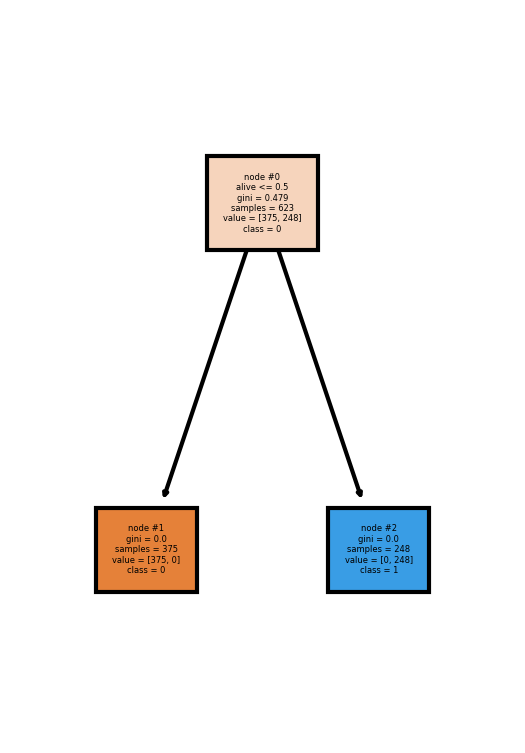

In [78]:
from sklearn import tree
import matplotlib.pyplot as plt

survived=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols =1,figsize = (2,3), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=survived, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Predictions on Train Dataset

In [79]:
train.head()

,survived,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare
370,1,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417
154,0,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125
458,1,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000
560,0,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500
595,0,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500


In [80]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,survived,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,Predicted
370,1,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417,1
154,0,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125,0
458,1,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000,1
560,0,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500,0
595,0,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500,0


### Model Performance Train

### Final accuracy of Model Before Pruning

In [81]:
from sklearn.metrics import classification_report
print(classification_report(train['survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       248

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



### Model Improvement by Pruning Method ( Cut Tree)

In [82]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=40, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=40)

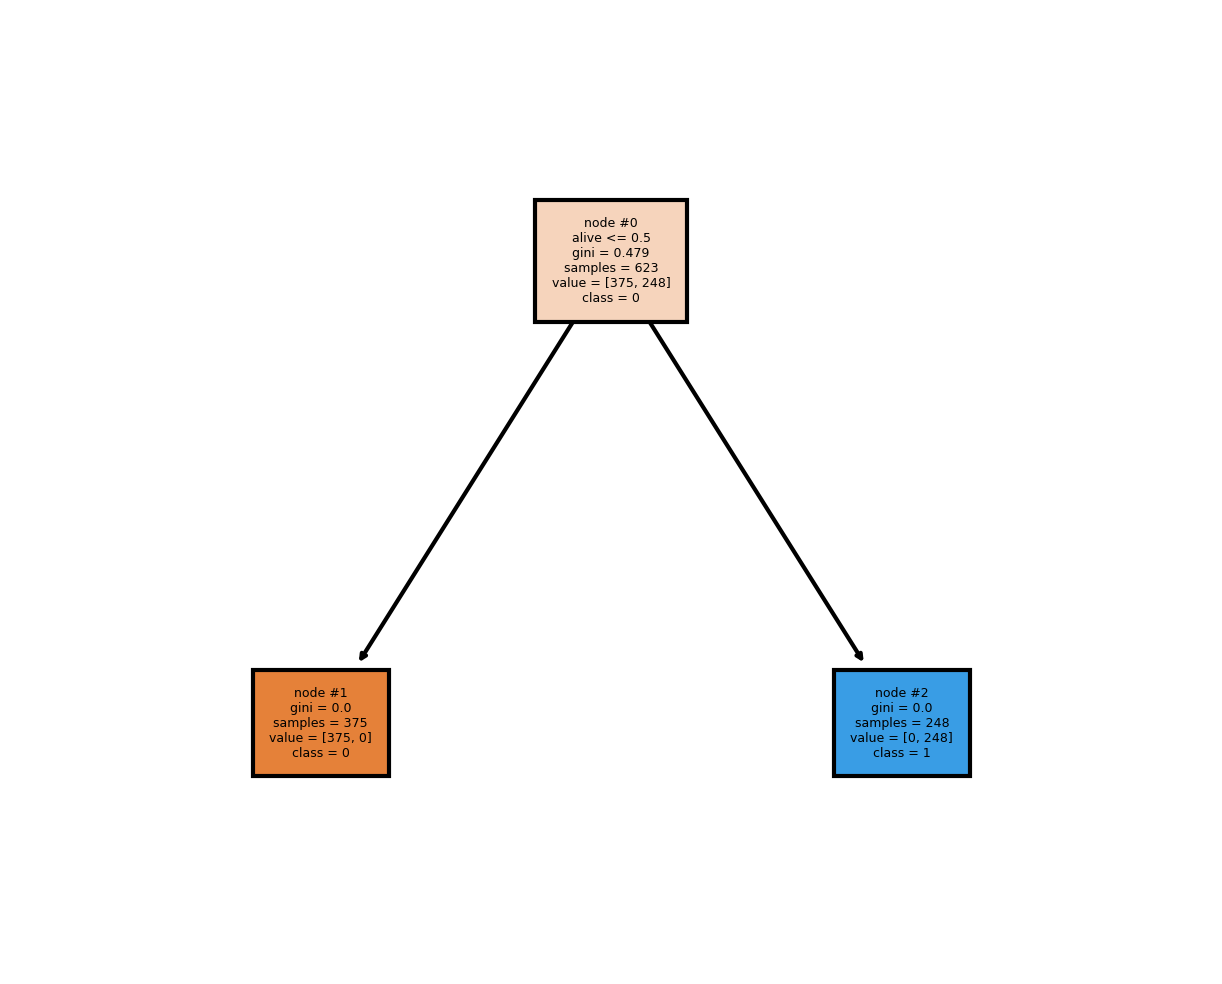

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt

survived=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=survived, # 0 , 1
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [84]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,survived,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,Predicted
370,1,1,0,0,1,4,0,1,1,25.0,1.0,0.0,55.4417,1
154,0,1,2,2,1,2,2,0,3,24.0,0.0,0.0,7.3125,0
458,1,0,2,1,2,2,2,1,2,50.0,0.0,0.0,10.5000,1
560,0,1,1,2,1,2,1,0,3,24.0,0.0,0.0,7.7500,0
595,0,1,2,2,1,2,2,0,3,36.0,1.0,0.0,24.1500,0


In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train['survived'], train['Predicted']))

[[375   0]
 [  0 248]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(train['survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       248

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



### Predictions on Test Dataset

In [87]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived
232,1,2,1,1,2,2,0,2,54.5,0.0,0.0,13.5,0
774,0,2,1,2,2,2,1,2,54.0,1.0,0.0,23.0,1
110,1,2,0,1,2,2,0,1,47.0,0.0,0.0,52.0,0
722,1,2,1,1,2,2,0,2,34.0,0.0,0.0,13.0,0
333,1,2,2,1,2,2,0,3,16.0,2.0,0.0,18.0,0


In [88]:
test['Predicted']=dt.predict(X_test)
test.head()

,sex,embarked,class,who,deck,embark_town,alive,pclass,age,sibsp,parch,fare,survived,Predicted
232,1,2,1,1,2,2,0,2,54.5,0.0,0.0,13.5,0,0
774,0,2,1,2,2,2,1,2,54.0,1.0,0.0,23.0,1,1
110,1,2,0,1,2,2,0,1,47.0,0.0,0.0,52.0,0,0
722,1,2,1,1,2,2,0,2,34.0,0.0,0.0,13.0,0,0
333,1,2,2,1,2,2,0,3,16.0,2.0,0.0,18.0,0,0


### Model Performance Metrics on Test data

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test['survived'], test['Predicted']))

[[174   0]
 [  0  94]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(test['survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        94

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



## Comparison:
For the Taitanic Dataset the Navie Bayes and Decision Tree model getting 100% accuracy on both tarin and test data. The K-NN model was not as accuret with 84% on train and 72% on test data here so much differance between them.So Here Decision Tree and Naive Bayes Model is better for Taitanic Dataset.